In [1]:
# Import math functions from NumPy
from numpy import *

# Import plotting functions from binomialhelper
from binomialhelper import plot_asset_path, plot_probability, plot_binomial_tree

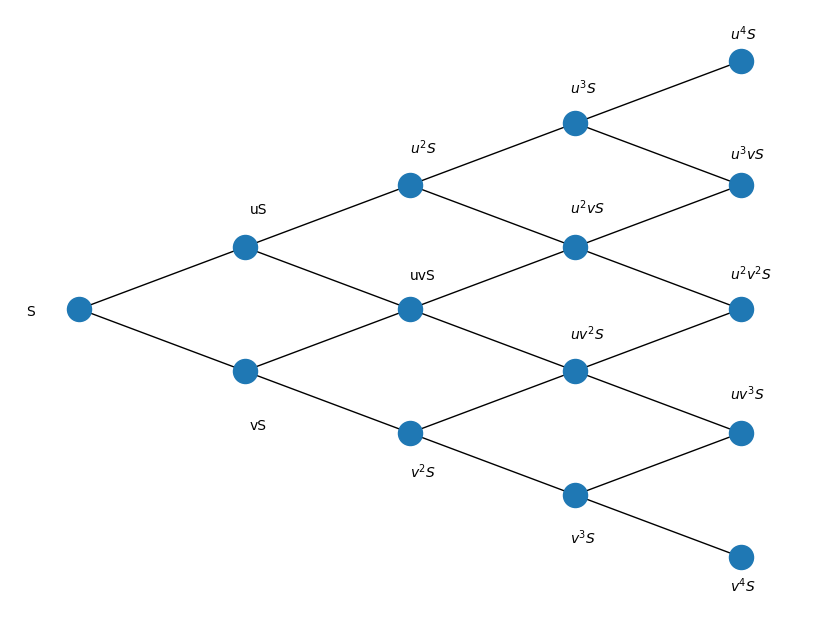

In [2]:
# Plot asset price path
plot_asset_path()

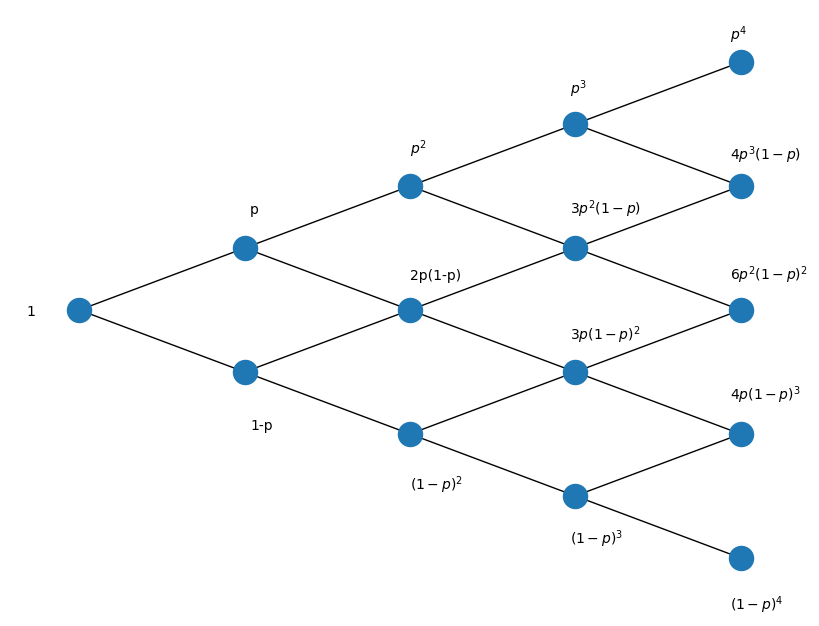

In [3]:
# Plot node probability
plot_probability()

In [15]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    
    Params
    -------
    spot        int or float        - spot price
    strike      int or float        - strike price
    rate        float               - interest rate
    sigma       float               - volatility
    time        int or float        - expiration time
    steps       int                 - number os trees
    output      int                 - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    
    Returns
    -------
    out:        ndarray
    An array object of price, payoff, option value, and delta specified by the output parameter
    """
    
    # params
    ts = time/steps
    u = 1 + sigma*sqrt(ts)
    v = 1 - sigma*sqrt(ts)
    p = 0.5 + rate*sqrt(ts)/ (2*sigma)
    df = 1/(1 + rate*ts)
    
    # initialize arrays
    px = zeros((steps + 1, steps + 1))
    cp = zeros((steps + 1, steps + 1))
    V = zeros((steps + 1, steps + 1))
    d = zeros((steps + 1, steps + 1))
    
    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,j)*power(u,j-1)
            cp[i,j] = maximum(px[i,j]-strike, 0)
            
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j == steps+1):
                V[i, j-1] = cp[i, j-1]
                d[i, j-1] = 0
            else:
                V[i, j-1] = df*(p*V[i,j] + (1-p)*V[i+1, j])
                d[i, j-1] = (V[i,j]-V[i+1,j]/(px[i,j] - px[i+1,j]))
    
    results = around(px,2), around(cp, 2), around(V, 2), around(d, 4)
    
    return results[output]


In [17]:
# Asset price
px = binomial_option(100, 102, 0.1, 0.2, 1, 10, 0)
px

array([[94.05, 93.68, 93.3 , 92.93, 92.56, 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  , 93.68, 93.3 , 92.93, 92.56, 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  , 93.3 , 92.93, 92.56, 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  , 92.93, 92.56, 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  , 92.56, 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , 92.19, 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 91.82, 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 91.45, 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 91.08,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        90.72, 90.36],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.

In [16]:
# Intrinsic value of option
cp = binomial_option(100, 102, 0.1, 0.2, 1, 10, 1)
cp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
# Option price
opx = binomial_option(100, 102, 0.1, 0.2, 1, 10, 2)
opx

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
# Option delta
d = binomial_option(100, 102, 0.1, 0.2, 1, 10, 3)
d

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.],
       [ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.],
       [ 0.,  0., nan, nan, nan, nan, nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 0.00


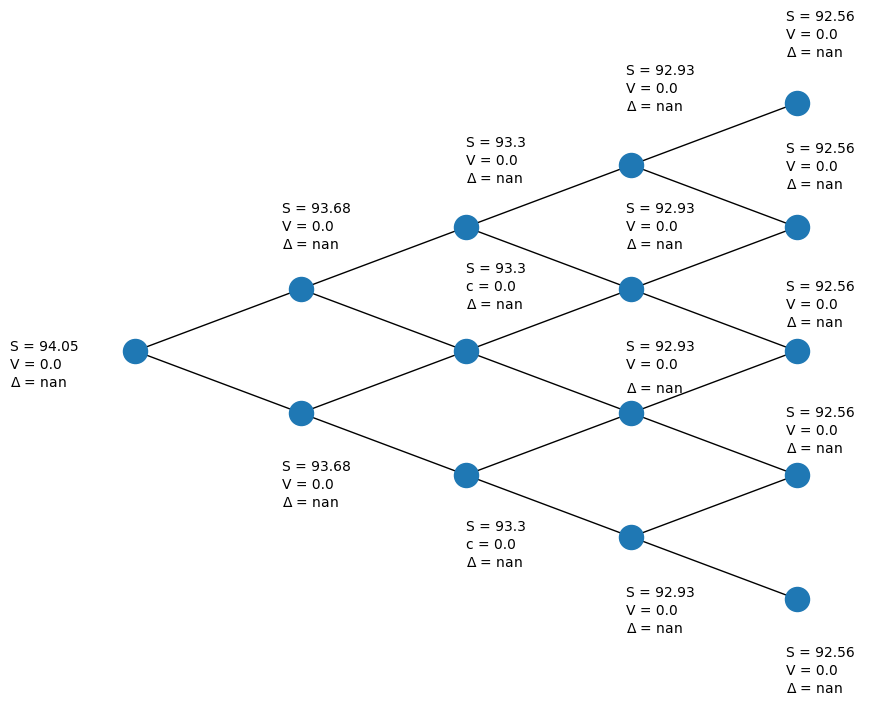

In [36]:
# Plot a 4-step Binomial Tree
plot_binomial_tree(px[0,0], px, opx, d)